In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [7]:
gas=np.loadtxt('MackeyGlass.txt', delimiter=',')

In [8]:
gas

array([[0.982477, 1.085805, 1.2     , 0.888982],
       [0.888982, 0.982477, 1.085805, 0.804384],
       [0.804384, 0.888982, 0.982477, 0.727837],
       ...,
       [0.971623, 0.951448, 0.921189, 0.982832],
       [0.982832, 0.971623, 0.951448, 0.986405],
       [0.986405, 0.982832, 0.971623, 0.98386 ]])

In [9]:
gasIn=gas[:,[0,1]]
gasOut=gas[:,2]

gasInTrain, gasInTest, gasOutTrain, gasOutTest = train_test_split(gasIn, gasOut, test_size=0.3)

In [10]:
gasScaler = StandardScaler()
gasScaler.fit(gasIn)
gasInTrainStd = gasScaler.transform(gasInTrain)
gasInTestStd = gasScaler.transform(gasInTest)

In [11]:
gasMLP = MLPRegressor(hidden_layer_sizes=(5), learning_rate_init=0.1, momentum=0.9, max_iter=1000)
gasMLPTrained = gasMLP.fit(gasInTrainStd, gasOutTrain)
gasPred = gasMLPTrained.predict(gasInTestStd)

In [12]:
from sklearn.metrics import mean_squared_error
MSEAccuracy = mean_squared_error(gasOutTest, gasPred)
print("MSE: %.5f" % MSEAccuracy)

MSE: 0.00288


In [13]:
from sklearn.metrics import mean_absolute_error
MAEAccuracy = mean_absolute_error(gasOutTest, gasPred)
print("MAE: %.5f" % MAEAccuracy)

MAE: 0.04299


In [14]:
from sklearn.metrics import r2_score
R2Accuracy = r2_score(gasOutTest, gasPred)
print("R2: %.5f" % R2Accuracy)

R2: 0.94626


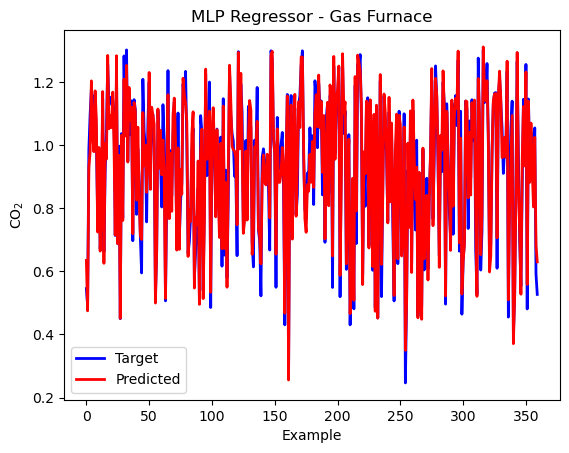

In [35]:
import matplotlib.pyplot as plt
X=range(0,len(gasOutTest))
plt.figure()
plt.plot(X,gasOutTest, color='blue', label='Target', linewidth=2)
plt.plot(X,gasPred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Example')
plt.ylabel('CO$_2$')
plt.title('MLP Regressor - Gas Furnace')
plt.legend()
plt.show()